# Tutorial for fitting uranium resonances using `pleiades`
Tsviki Y. Hirsh and Alex Long

July 9th 2024

This is a notebook to guide a pleiades user to fitting a neutron transmission spectrum of uranium isotopes. For this tutorial we will be using the simulated data set `u235-u238.twenty` in `examples/data/`

##### import the needed libraries from pleiades

In [3]:
import json
from pleiades import sammyUtils, sammyOutput, sammyPlotter

### Loading a config file for SAMMY fitting

We have a uranium.ini file that contains many of the parameters that we 

In [4]:
# Load the configuration file from the ini file in the parent directory
uranium = sammyUtils.SammyFitConfig('../configFiles/uranium.ini')

FileNotFoundError: Config file ..//uranium.ini not found.

#### <span style="color:orange">What happend:</span> 
Pleiades has now created a couple of directories base on the keys and vlaues under ['directories'] in makeCompoundFit_Eu.in

Given that sammy needs to use ascii files to run, and also generates additional files that need to be parsed. We have to create a directory that contains all the needed subfolders to configure, execute, and interpret sammy runs. This is done by creating a archive_dir, which can be set in the makeCompoundFit_Eu.ini config file. If none is given then it defualts to ".archive"

Currently nothing is stored in these directories, but we will start filling them with sammy files. i

In [5]:
!ls -lah 
!ls -lah .archive/

total 1056
drwxr-xr-x  6 alexanderlong  staff   192B Sep  5 19:53 .
drwxr-xr-x  6 alexanderlong  staff   192B Sep  2 11:22 ..
drwxr-xr-x  5 alexanderlong  staff   160B Sep  5 19:55 .archive
drwxr-xr-x  2 alexanderlong  staff    64B Sep  5 19:53 data
-rw-r--r--  1 alexanderlong  staff   198K Sep  2 11:22 natEu_fit_tutorial.ipynb
-rw-r--r--  1 alexanderlong  staff   324K Sep  5 19:55 u_fit_tutorial.ipynb
total 0
drwxr-xr-x  5 alexanderlong  staff   160B Sep  5 19:55 .
drwxr-xr-x  6 alexanderlong  staff   192B Sep  5 19:53 ..
drwxr-xr-x  2 alexanderlong  staff    64B Sep  5 19:53 endf
drwxr-xr-x  2 alexanderlong  staff    64B Sep  5 19:53 sammy_fit
drwxr-xr-x  3 alexanderlong  staff    96B Sep  5 19:55 u235-u238


#### Now Create the needed parFiles from ENDF for the Eu isotopes

Here we are using the create_parFile_from_endf() funtion with the natEu SammyFitConfig object to create the needed parFiles for each of the Eu isotopes list in the makeCompoundFit_Eu.ini file. 

Note: You can change the print verbose level to print out important variables and paths. 

In [7]:
# Create the needed parFiles from ENDF for the isotopes in the configuration file
sammyUtils.create_parFile_from_endf(uranium,verbose_level=2)

{'Card1': {'title': 'DEFAULT SAMMY INPUT FILE - 2024-08-29 22:45:14'}, 'Card2': {'elmnt': 'U-235', 'aw': 'auto', 'emin': '0.1', 'emax': '50.', 'nepnts': '10001', 'itmax': '4', 'icorr': '50', 'nxtra': '0', 'iptdop': '9', 'iptwid': '5', 'ixxchn': '0', 'ndigit': '2', 'idropp': '2', 'matnum': '0'}, 'Card3': {'commands': 'TWENTY,DO NOT SOLVE BAYES EQUATIONS,INPUT IS ENDF/B FILE'}, 'Card5': {'temp': '300.5', 'dist': 14.96, 'deltal': '0.0', 'deltae': 0.001, 'deltag': 0.001, 'delttt': '0.0', 'elowbr': '0.0'}, 'Card7': {'crfn': 0.001, 'thick': '1.0', 'dcova': '0.0', 'dcovb': '0.0', 'vmin': '0.0'}, 'Card8': {'cross': 'TRANSMISSION'}}
ENDF directory created at /Users/alexlong/Programs/PLEIADES/examples/Notebooks/.archive/endf
Copied /Users/alexlong/Programs/PLEIADES/nucDataLibs/resonanceTables/res_endf8.endf to /Users/alexlong/Programs/PLEIADES/examples/Notebooks/.archive/endf/res_endf8.endf
SAMMY input file created at /Users/alexlong/Programs/PLEIADES/examples/Notebooks/.archive/endf/U235/U235.i

#### <span style="color:orange">What happend:</span> 

Pleiades configured two SAMMY runs to generate the needed resonance parameters for the final SAMMY fit. These ENDF SAMMY runs are stored in the 'endf_dir' which is set in makeCompoundFit_Eu.ini

If you `ls` the .archive/endf directory, you will see two sub-dirs: Eu151 & Eu153. Each of these folders contains the results for running SAMMY to generate SAMNDF.PAR files for each respective isotope.

In [8]:
!ls -lah .archive/endf/U235/
!ls -lah .archive/endf/U235/results

total 24
drwxr-xr-x   7 alexlong  staff   224B Aug 29 22:45 .
drwxr-xr-x   5 alexlong  staff   160B Aug 29 22:45 ..
-rw-r--r--   1 alexlong  staff   455B Aug 29 22:45 U235.inp
-rw-r--r--   1 alexlong  staff   1.7K Aug 29 22:45 U235.out
-rw-r--r--   1 alexlong  staff    17B Aug 29 22:45 U235_ENDF-dummy.dat
lrwxr-xr-x   1 alexlong  staff    17B Aug 29 22:45 res_endf8.endf -> ../res_endf8.endf
drwxr-xr-x  10 alexlong  staff   320B Aug 29 22:45 results
total 4336
drwxr-xr-x  10 alexlong  staff   320B Aug 29 22:45 .
drwxr-xr-x   7 alexlong  staff   224B Aug 29 22:45 ..
-rw-r--r--   1 alexlong  staff   722K Aug 29 22:45 SAM36.DAT
-rw-r--r--   1 alexlong  staff   722K Aug 29 22:45 SAM38.DAT
-rw-r--r--   1 alexlong  staff     0B Aug 29 22:45 SAMMY.IO
-rw-r--r--   1 alexlong  staff   4.6K Aug 29 22:45 SAMMY.LPT
-rw-r--r--   1 alexlong  staff   500B Aug 29 22:45 SAMNDF.INP
-rw-r--r--   1 alexlong  staff   265K Aug 29 22:45 SAMNDF.PAR
-rw-r--r--   1 alexlong  staff   216K Aug 29 22:45 SAMQUA.PAR


#### Configure SAMMY for the fit of Uranium foil

Now that we have the needed SAMNDF.PAR files for each isotope (stored in the .archive/endf/Eu15* folders) we can configure all the needed SAMMY files to fit a naterual Eu transmission spectrum. 

The data for this is stored in `examples/data` and the path is set in makeCompoundFit_Eu.ini as `data_dir = "../data"`

In [9]:
# Configure the sammy run, this will create a compound parFile. 
sammyUtils.configure_sammy_run(uranium,verbose_level=1)

Creating SAMMY parFile files for isotopes: ['U-235', 'U-238'] with abundances: [0.01, 0.01]
Writing output parFile: /Users/alexlong/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/params.par
Creating SAMMY inpFile files for isotopes: ['U-235', 'U-238'] with abundances: [0.01, 0.01]
No config file given. Using default parameters.
Created compound input file: /Users/alexlong/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/input.inp
Symlinking data file: /Users/alexlong/Programs/PLEIADES/examples/data/u235-u238.twenty into /Users/alexlong/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238


#### <span style="color:orange">What happend:</span> 

Here Pleiades has taken all the needed information from the two (Eu151, Eu153) `SAMNDF.PAR` files and combined them to form a `params.par` file. Additionally Pleiades has created the needed input.inp file to run the natEu SAMMY fit.  

In [10]:
!ls -lah .archive/u235-u238/

total 56
drwxr-xr-x  5 alexlong  staff   160B Aug 29 22:45 .
drwxr-xr-x  4 alexlong  staff   128B Aug 29 22:45 ..
-rw-r--r--  1 alexlong  staff   582B Aug 29 22:45 input.inp
-rw-r--r--  1 alexlong  staff    22K Aug 29 22:45 params.par
lrwxr-xr-x  1 alexlong  staff    64B Aug 29 22:45 u235-u238.twenty -> /Users/alexlong/Programs/PLEIADES/examples/data/u235-u238.twenty


#### Running the SAMMY fit on the Uranium foil data

Now that everything is set we are prepared to run the actual fit on the natural Eu data. 
Note: You can change the print verbose level to print out important variables and paths. 

In [8]:
# Run the sammy fit.
success = sammyUtils.run_sammy(uranium,verbose_level=1)

Running SAMMY for /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238
Output file: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/output.out
Running SAMMY for u235-u238...
SAMMY executed successfully.


#### <span style="color:orange">What happend:</span> 

Here Pleiades should have successfully ran a SAMMY fit on the simulated Urainum transmission data. If is was not successful then we should have gotten an print statement telling us the SAMMY fit failed. 

#### Parsing the output of the SAMMY run on uranium foil. 

Now we can use Pleiades to analyze the results of the SAMMY fit using the `sammyOutput` library

In [11]:
uranium_fit = sammyOutput.lptResults(uranium.params['directories']['sammy_fit_dir']+"/results/SAMMY.LPT")

# Print the final iteration of the fit which are the results we are interested in.
print(json.dumps(uranium_fit._results['Iteration Results'][-1],indent=4))


{
    "Temperature": 296.6,
    "Thickness": 0.11592,
    "DELTA-L": 0.0,
    "DELTA-T-GAUS": 0.001,
    "DELTA-T-EXP": 0.001,
    "NORMALIZATION": "",
    "Backgrounds": {
        "BCKG(CONST)": "",
        "BCKG/SQRT(E)": "",
        "BCKG*SQRT(E)": ""
    },
    "Nuclides": [
        {
            "Number": "1",
            "Abundance": "1.2760E-02",
            "Vary Flag": "(  1)",
            "Mass": "235.044",
            "SpinGroups": "1  2"
        },
        {
            "Number": "2",
            "Abundance": "5.7509E-03",
            "Vary Flag": "(  2)",
            "Mass": "238.051",
            "SpinGroups": "3  4  5"
        }
    ],
    "Chi2": 49552.2,
    "RedChi2": 9.91043
}


Now we can plot the intial and final results, along with the data to see how well SAMMY was able to fit the data. 

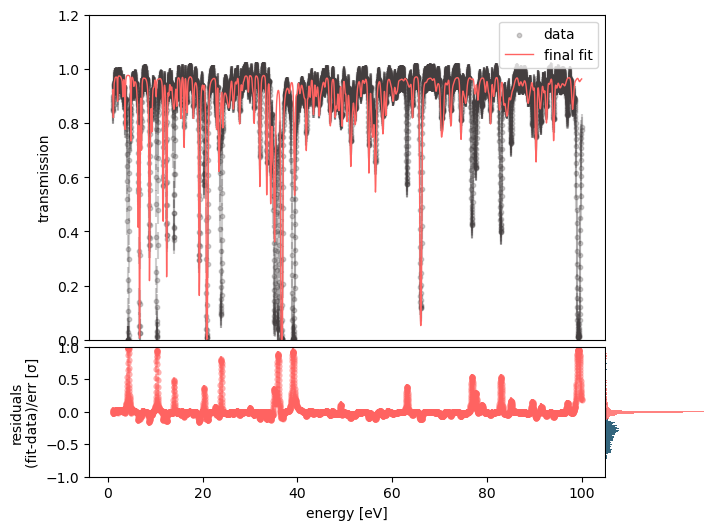

In [12]:
# Plot the results
sammyPlotter.process_and_plot_lst_file(uranium.params['directories']['sammy_fit_dir']+"/results/SAMMY.LST", residual=True,quantity='transmission')

#### Something is missing!

Looking at the plot it appears that we are not capturing all the isotopes! We should think about what isotopes we should add to get a better fit. 

* First list the isotopes and abundances, 
* Then we can update the abundances based on the lptresults
* Finally we can add another isotope, like Ta (hint: its Ta)

Additionally, we can change the name of the `sammy_fit_dir` in case we want to compare new fit results to the original. 

In [13]:
# Print out the initial parameters for the isotopes (names and abundances)
print(f"Isotopes: {uranium.params['isotopes']['names']}")
print(f"Initial Abundance: {uranium.params['isotopes']['abundances']}")
print(f"Initial Thickness: {uranium.params['broadening']['thickness']}")

# Update the isotope abundances with the new results from the SAMMY fit
for i, isotope in enumerate(uranium.params['isotopes']['names']):
    uranium.params['isotopes']['abundances'][i] = float(uranium_fit._results['Iteration Results'][-1]['Nuclides'][i]['Abundance'])
    
# Update the sample thickness with the new results from the SAMMY fit
uranium.params['broadening']['thickness'] = float(uranium_fit._results['Iteration Results'][-1]['Thickness'])

# check your work!
print(f"New Abundance: {uranium.params['isotopes']['abundances']}")
print(f"New Thickness: {uranium.params['broadening']['thickness']}")

# Update the `sammy_fit_dir` to a new directory name
uranium.params['directories']['sammy_fit_dir'] = uranium.params['directories']['sammy_fit_dir'] + "-ta181"

# check your work!
print(f"New fit directory: {uranium.params['directories']['sammy_fit_dir']}")


Isotopes: ['U-235', 'U-238']
Initial Abundance: [0.01, 0.01]
Initial Thickness: 1.0
New Abundance: [0.01276, 0.0057509]
New Thickness: 0.11592
New fit directory: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238-ta181


In [14]:
# Add Ta to the isotopes names and set initial abundance to 0.01
uranium.params['isotopes']['names'].append('Ta-181')
uranium.params['isotopes']['abundances'].append(0.01)

# check your work!
print(f"Names: {uranium.params['isotopes']['names']}")
print(f"Abundance: {uranium.params['isotopes']['abundances']}")

Names: ['U-235', 'U-238', 'Ta-181']
Abundance: [0.01276, 0.0057509, 0.01]


### Create a SAMMY parameter file from ENDF for the newly added Ta-181 isotope.  

Now that we have added the third isotope of Ta-181, we need to have Pleiades pull and create a parFile that we can pull resonance parameters from 

In [15]:
# Create the needed parFiles from ENDF for the isotopes in the configuration file
sammyUtils.create_parFile_from_endf(uranium,verbose_level=0)

#### Check the archive file to see if a Ta181 sub-folder was created> 

In [16]:
!ls -lah .archive/endf/

total 20K
drwxr-xr-x 5 l280162 l280162 4.0K Jul 10 22:38 .
drwxr-xr-x 4 l280162 l280162 4.0K Jul 10 22:35 ..
drwxr-xr-x 3 l280162 l280162 4.0K Jul 10 22:38 Ta181
drwxr-xr-x 3 l280162 l280162 4.0K Jul 10 22:38 U235
drwxr-xr-x 3 l280162 l280162 4.0K Jul 10 22:38 U238


### Configure SAMMY inputs and parameter files with new set of isotopes. 

Now that we have added the third isotope of Ta-181, we need to have Pleiades reconfigure the needed SAMMY files to execute a SAMMY fit using all three isotopes.

In [17]:
# Configure the sammy run, this will create a compound parFile. 
sammyUtils.configure_sammy_run(uranium,verbose_level=1)

Creating SAMMY parFile files for isotopes: ['U-235', 'U-238', 'Ta-181'] with abundances: [0.01276, 0.0057509, 0.01]
Writing output parFile: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238-ta181/params.par
Creating SAMMY inpFile files for isotopes: ['U-235', 'U-238', 'Ta-181'] with abundances: [0.01276, 0.0057509, 0.01]
No config file given. Using default parameters.
Created compound input file: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238-ta181/input.inp
Symlinking data file: /home/l280162/Programs/PLEIADES/examples/data/u235-u238.twenty into /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238-ta181


#### `ls` the directory to see if anything was updated. 

In [18]:
!ls -lah .archive/

total 20K
drwxr-xr-x 5 l280162 l280162 4.0K Jul 10 22:39 .
drwxr-xr-x 4 l280162 l280162 4.0K Jul 10 22:35 ..
drwxr-xr-x 5 l280162 l280162 4.0K Jul 10 22:38 endf
drwxr-xr-x 3 l280162 l280162 4.0K Jul 10 22:38 u235-u238
drwxr-xr-x 2 l280162 l280162 4.0K Jul 10 22:39 u235-u238-ta181


### Execute a SAMMY fit with the updated inputs and parameter files 

Now that everything is set, we can run SAMMY with the updated input and parameter files (keeping the same data file).

Again, we want to make sure that we get the "SAMMY executed successfully." print out. Otherwise we need to check output.out


In [19]:
# Run the sammy fit.
success = sammyUtils.run_sammy(uranium,verbose_level=1)

Running SAMMY for /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238-ta181
Output file: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238-ta181/output.out
Running SAMMY for u235-u238-ta181...
SAMMY executed successfully.


#### Grab the results of the SAMMY fit using the `lptResults` class 

In [20]:
uranium_fit = sammyOutput.lptResults(uranium.params['directories']['sammy_fit_dir']+"/results/SAMMY.LPT")
print(json.dumps(uranium_fit._results['Iteration Results'][-1],indent=4))

{
    "Temperature": 296.6,
    "Thickness": 0.097079,
    "DELTA-L": 0.0,
    "DELTA-T-GAUS": 0.001,
    "DELTA-T-EXP": 0.001,
    "NORMALIZATION": "",
    "Backgrounds": {
        "BCKG(CONST)": "",
        "BCKG/SQRT(E)": "",
        "BCKG*SQRT(E)": ""
    },
    "Nuclides": [
        {
            "Number": "1",
            "Abundance": "1.0028E-02",
            "Vary Flag": "(  1)",
            "Mass": "235.044",
            "SpinGroups": "1  2"
        },
        {
            "Number": "2",
            "Abundance": "4.9281E-03",
            "Vary Flag": "(  2)",
            "Mass": "238.051",
            "SpinGroups": "3  4  5"
        },
        {
            "Number": "3",
            "Abundance": "1.1362E-02",
            "Vary Flag": "(  3)",
            "Mass": "180.948",
            "SpinGroups": "6  7"
        }
    ],
    "Chi2": 54.1535,
    "RedChi2": 0.0108307
}


#### <span style="color:red">Bug:</span> Pleiades is only printing two isotopes. 

#### Plot the final results!

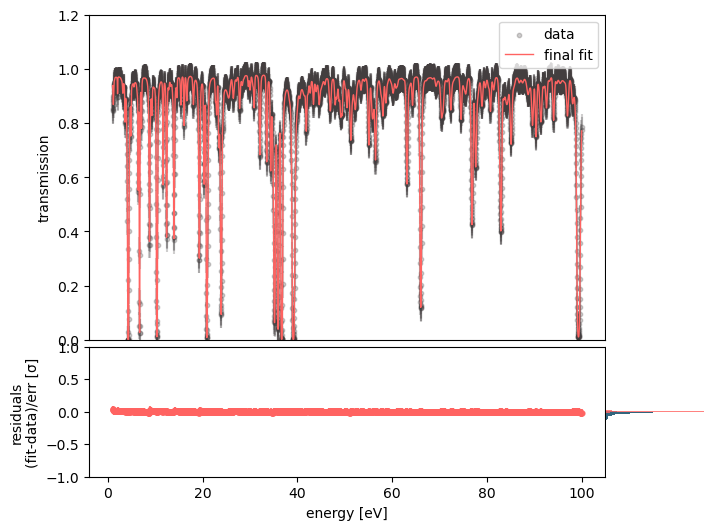

In [21]:
# Plot the results
sammyPlotter.process_and_plot_lst_file(uranium.params['directories']['sammy_fit_dir']+"/results/SAMMY.LST", residual=True,quantity='transmission')